In [1]:
#imorting necessary libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#using pandas to read the training and test data
data = pd.read_excel("/content/train.xlsx")

In [6]:
#displaying the first and last 5 rows of the data
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64


###### the training data has 10,683 rows but 'Route', 'Total_Stops' have only 10,682 rows
###### This shows that there are some *missing values* in the dataset

##**Starting the preliminary analysation of data**

In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
data.describe(include = "all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
data.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0           IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1        Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2      Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3           IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4           IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302
...            ...             ...       ...  ...         ...             ...    ...
10678     Air Asia       9/04/2019   Kolkata  ...    non-stop         No info   4107
10679    Air India      27/04/2019   Kolkata  ...    non-stop         No info   4145
10680  Jet Airways      27/04/2019  Banglore  ...    non-stop         No info   7229
10681      Vistara      01/03/2019  Banglore  ...    non-stop         No info  12648
10682    Air India       9/05/201

##**Identifying and dealing with Missing values**

In [12]:
data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#To count how many missing values are there in the dataset in row as well as column
data.isnull().sum().sum()

2

In [14]:
#To count how many missing values are there in the dataset column wise
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# **Data Cleaning**

In [24]:
data = data.fillna(training_data['Route'].value_counts().index[0])
data.isnull().sum().sum()

0

##### It shows that we have cleaned our data

## These factors directly affect airline ticket prices:

##### **1. Airline**
##### **2. Date of Journey**
##### **3. Route**
##### **4. Duration**
##### **5. Total stops**

#**Data Formatting**


In [0]:
# Dropping all unnecessary columns
data = data.drop(['Source','Destination','Dep_Time','Arrival_Time','Additional_Info'], axis=1)

In [26]:
data.dtypes

Airline            object
Date_of_Journey    object
Route              object
Duration           object
Total_Stops        object
Price               int64
dtype: object

#### Now we can see that Airline, Date_of_Journey, Route, Duration and Total Stops are not numerical or integer data type

##Formatting Airlines column

In [27]:
# All different unique airlines
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

##### Here you can find who had the most number of bookings.

In [28]:
# Showing details according to airlines

filter = data['Airline']=="Jet Airways"
data.where(filter).count()

Airline            3849
Date_of_Journey    3849
Route              3849
Duration           3849
Total_Stops        3849
Price              3849
dtype: int64

In [0]:
# Encoding airline categorical values to numerical values
le = LabelEncoder()
data['Airline'] = le.fit_transform(data['Airline'])

In [30]:
data['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [31]:
data.head()

,Airline,Date_of_Journey,Route,Duration,Total_Stops,Price
0,3,24/03/2019,BLR → DEL,2h 50m,non-stop,3897
1,1,1/05/2019,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,4,9/06/2019,DEL → LKO → BOM → COK,19h,2 stops,13882
3,3,12/05/2019,CCU → NAG → BLR,5h 25m,1 stop,6218
4,3,01/03/2019,BLR → NAG → DEL,4h 45m,1 stop,13302


In [32]:
# To verify Jet Airways is now termed as 4

filter = data['Airline']==4
data.where(filter).count()

Airline            3849
Date_of_Journey    3849
Route              3849
Duration           3849
Total_Stops        3849
Price              3849
dtype: int64

### Formatting Date_of_Journey column
###### We need to split it into date, month, and year

In [0]:
data['Date'] = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year'] = data['Date_of_Journey'].str.split('/').str[2]

In [0]:
# Now convert them into int type
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [0]:
# Drop original date_of_journey column
data = data.drop(['Date_of_Journey'], axis=1)

In [36]:
data.head()

,Airline,Route,Duration,Total_Stops,Price,Date,Month,Year
0,3,BLR → DEL,2h 50m,non-stop,3897,24,3,2019
1,1,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,2019
2,4,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,2019
3,3,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,2019
4,3,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,2019


### Formatting Duration
###### We need to deal with alphabet 'h' and 'm' alongwith whitespace

In [37]:
D = []
for i in data['Duration']:
    for j in range(0,len(i)):
        i=str(i).replace('h','')
        i=str(i).replace('m','')
        i = str(i).replace(' ','')
    D.append(i)
data['Duration_Mins'] = D
data.head()

,Airline,Route,Duration,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,250
1,1,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,2019,725
2,4,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,2019,19
3,3,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,2019,525
4,3,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,2019,445


In [38]:
data.dtypes
#he type of Duration_Mins is object

Airline           int64
Route            object
Duration         object
Total_Stops      object
Price             int64
Date              int64
Month             int64
Year              int64
Duration_Mins    object
dtype: object

In [0]:
# Converting object type to integer data type
data['Duration_Mins'] = data['Duration_Mins'].astype(int)

In [40]:
# Finally converting hours into minutes

for i in range(0,len(data['Duration_Mins'])):
  if len(str(data['Duration_Mins'][i]))<=2:
    data['Duration_Mins'][i]*=60
  else:
    new=0
    s=''
    res = list(map(int, str(data['Duration_Mins'][i])))
    new=res[0]*60
    res.pop(0)
    for j in res:
      s=s+str(j)
    m=int(s)
    new = new + m
    data['Duration_Mins'][i]=new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
# Dropping original Duration column
data = data.drop(['Duration'], axis=1)

In [42]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,non-stop,3897,24,3,2019,170
1,1,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,445
2,4,DEL → LKO → BOM → COK,2 stops,13882,9,6,2019,1140
3,3,CCU → NAG → BLR,1 stop,6218,12,5,2019,325
4,3,BLR → NAG → DEL,1 stop,13302,1,3,2019,285


###Formatting Total_Stops column

In [43]:
for i in range(len(data['Total_Stops'])):
  if data['Total_Stops'][i]=='non-stop':
    data['Total_Stops'][i]='0'
  elif data['Total_Stops'][i]=='2 stops':
    data['Total_Stops'][i]='2'
  else:
    data['Total_Stops'][i]='1'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
# Converting object type to integer data type
data['Total_Stops'] = data['Total_Stops'].astype(int)

In [45]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,0,3897,24,3,2019,170
1,1,CCU → IXR → BBI → BLR,2,7662,1,5,2019,445
2,4,DEL → LKO → BOM → COK,2,13882,9,6,2019,1140
3,3,CCU → NAG → BLR,1,6218,12,5,2019,325
4,3,BLR → NAG → DEL,1,13302,1,3,2019,285


### Formatting Route column
##### Here I have used length function to distinguish if route is direct then its value is 0

In [49]:
# To know the different values so that I convert them easily to 3 different categories

for i in range(len(training_data['Route'])):
  print(len(str(training_data['Route'][i])))
  if i==10:
    break


9
21
21
15
15
9
15
15
15
15
15


In [0]:
for i in range(len(data['Route'])):
  if len(str(data['Route'][i]))==9:
    data['Route'][i]=0
  elif len(str(data['Route'][i]))==15:
    data['Route'][i]=1
  else:
    data['Route'][i]=2

In [0]:
# Converting object type to integer data type
data['Route'] = data['Route'].astype(int)

In [52]:
data.dtypes

Airline          int64
Route            int64
Total_Stops      int64
Price            int64
Date             int64
Month            int64
Year             int64
Duration_Mins    int64
dtype: object

## Data Visualization

In [72]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,2,0,3897,24,3,2019,170
1,1,2,2,7662,1,5,2019,445
2,4,2,2,13882,9,6,2019,1140
3,3,2,1,6218,12,5,2019,325
4,3,2,1,13302,1,3,2019,285


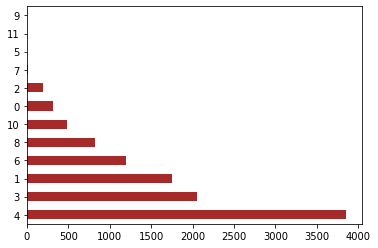

In [62]:
data['Airline'].value_counts().plot(kind='barh', color='brown')

##### This shows that Jet Airways (labelled as 4) has the max number of bookings

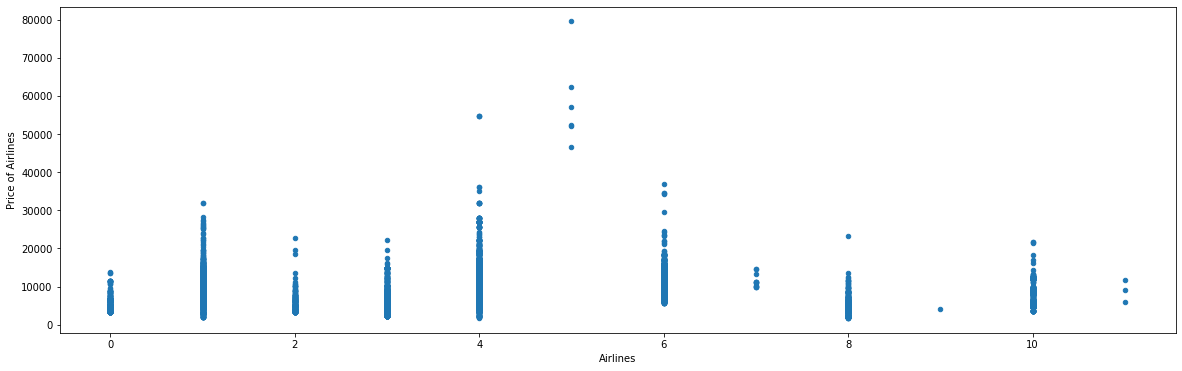

In [59]:
ax = data.plot.scatter('Airline',y='Price', figsize=(20,6))
plt.xlabel('Airlines')
plt.ylabel('Price of Airlines')
plt.show()

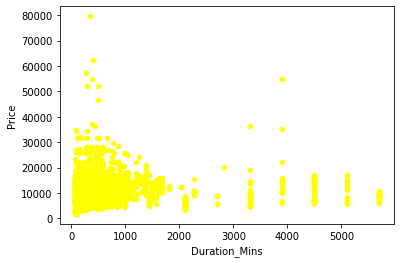

In [64]:
ax1 = data.plot.scatter('Duration_Mins','Price', color='yellow')

##### From the above graph it is quite clear that flights with less travel time i.e. Duration_Mins are booked by maximum number of users.

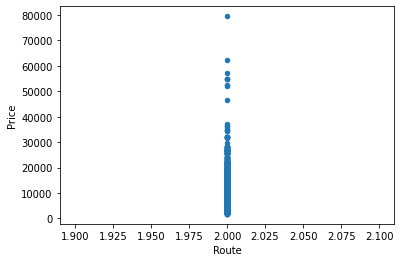

In [69]:
ax1 = data.plot.scatter('Route','Price')

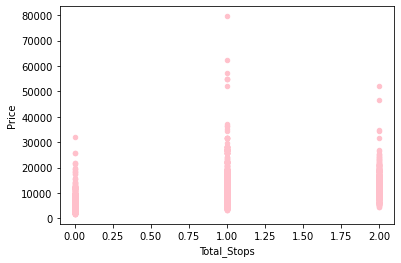

In [73]:
ax1 = data.plot.scatter('Total_Stops','Price', color='pink')

##### It is very obvious that flight with 0 stop or non-stop flights are cheaper than with 1 or 2 stops.

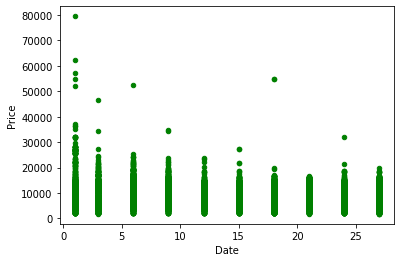

In [61]:
ax1 = data.plot.scatter('Date','Price',color='green')

# Data Normalization

In [0]:
training_data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,0,0,3897,24,3,2019,170
1,1,2,2,7662,1,5,2019,445
2,4,2,2,13882,9,6,2019,1140
3,3,1,1,6218,12,5,2019,325
4,3,1,1,13302,1,3,2019,285


### Train-Test-Split


In [0]:
y = data['Price']
x = data.drop(['Price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

In [0]:
df_train = data

### Faeture Scaling

In [76]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(x_train)
mm_scaler.transform(x_test)

array([[0.54545455, 0.        , 0.5       , ..., 0.66666667, 0.        ,
        0.05501331],
       [0.09090909, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.1011535 ],
       [0.54545455, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.0621118 ],
       ...,
       [0.09090909, 0.        , 1.        , ..., 1.        , 0.        ,
        0.12244898],
       [0.27272727, 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.01597161],
       [0.54545455, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.06654836]])

### PCA

In [0]:
# Make an instance of the Model
pca = PCA()

In [0]:
x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

In [0]:
explained_variance = pca.explained_variance_ratio_ 

In [80]:
explained_variance

array([9.99794616e-01, 1.86711027e-04, 1.42041607e-05, 3.48624990e-06,
       9.82734042e-07, 1.10822117e-37, 0.00000000e+00])

# Data modelling and prediction

#### Random forest

In [84]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [97]:
display(regressor.score(x_test,y_test))

0.7512421498499715

In [98]:
display(regressor.score(x_train,y_train))

0.9133453132152562

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Train data\n')
print("Absolute Error = ",mean_absolute_error(y_pred_train,y_train))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_train,y_train))
print("\nTest data\n")
print("Absolute Error = ",mean_absolute_error(yY_pred,y_test))
print("Mean percentage error = ",mean_absolute_percentage_error(yY_pred,y_test))

Train data

Absolute Error =  809.4278719704164
Mean percentage error =  8.560945425471482

Test data

Absolute Error =  1516.0126539387193
Mean percentage error =  15.904019914945971


#### Linear Regression

In [92]:
lr = LinearRegression() 
lr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting the test set result using  
# predict function under LinearRegression
y_pred_test = lr.predict(x_test) 
y_pred_train = lr.predict(x_train)

In [94]:
len(y_pred)

3561

In [95]:
display(lr.score(x_train,y_train))

0.4071907244073676

In [96]:
display(lr.score(x_test,y_test))

0.44893523197998464

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Train data\n')
print("Absolute Error = ",mean_absolute_error(y_pred_train,y_train))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_train,y_train))
print("\nTest data\n")
print("Absolute Error = ",mean_absolute_error(yY_pred,y_test))
print("Mean percentage error = ",mean_absolute_percentage_error(yY_pred,y_test))

Train data

Absolute Error =  2510.4334290278357
Mean percentage error =  28.12505164306626

Test data

Absolute Error =  1516.0126539387193
Mean percentage error =  15.904019914945971


In [0]:
# Data Normalization
#y = training_data(['Airline', 'Route', 'Total_Stops', ])

#training_data['Price']=((training_data['Price']-training_data['Price'].min())/(training_data['Price'].max()-training_data['Price'].min()))*2
#training_data['Duration_Mins']=((training_data['Duration_Mins']-training_data['Duration_Mins'].min())/(training_data['Duration_Mins'].max()-training_data['Duration_Mins'].min()))*2

#training_data['Route']=((training_data['Route']-training_data['Route'].min())/(training_data['Route'].max()-training_data['Route'].min()))*2
#training_data['Duration_Mins'] = round(training_data['Duration_Mins'],2)

#training_data['Price'] = round(training_data['Price'],2)

#print(training_data['Date'].unique())
#print(training_data['Month'].unique())

#Normalizing the data
#Applying Z-Score inprice column
#training_data['Normalized_Price'] = (training_data['Price']-training_data['Price'].mean())/training_data['Price'].std()
#training_data['Normalized_Price']

# ML Decision Trees

#from sklearn.tree import DecisionTreeClassifier 
#dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
#dtc.fit(x_train, y_train) 

#y_pred_test = dtc.predict(x_test) 
#y_pred_train = dtc.predict(x_train) 

#from sklearn.metrics import accuracy_score

#print("Confusion Matrix: ", confusion_matrix(y_train, y_pred_train)) 
      
#print ("Accuracy : ", accuracy_score(y_train,y_pred_train)*100)

#from sklearn.linear_model import Ridge
#ridge_model = Ridge(alpha = 0.9)
#ridge_model.fit(x_train,y_train)

#ridge_train_pred = ridge_model.predict(x_train)
#print(mean_absolute_percentage_error(ridge_train_pred,y_train))

#ridge_test_pred = ridge_model.predict(x_test)
#print(mean_absolute_percentage_error(ridge_test_pred,y_test))